## Задание 1. Свёртка

**5 баллов**

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $(W,H)$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

Результатм работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$: 
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) 
к изображению, после чего выведите результат на экран.

Можно работать и с `numpy`, и с `torch`, как вам угодно.

In [ ]:
import torch
import numpy as np
import torch.nn.functional as F

In [ ]:
# Можете тренироваться на этом примере
a = np.arange(9).reshape((3, 3))
M = torch.FloatTensor(np.block([[a + 2, a + 5],[a + 7, a + 9]]))
print(M)
print(F.pad(M, (1, 1, 1, 1), "constant", 0))
print(M[4:6, 4:6])

tensor([[ 2.,  3.,  4.,  5.,  6.,  7.],
        [ 5.,  6.,  7.,  8.,  9., 10.],
        [ 8.,  9., 10., 11., 12., 13.],
        [ 7.,  8.,  9.,  9., 10., 11.],
        [10., 11., 12., 12., 13., 14.],
        [13., 14., 15., 15., 16., 17.]])
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  2.,  3.,  4.,  5.,  6.,  7.,  0.],
        [ 0.,  5.,  6.,  7.,  8.,  9., 10.,  0.],
        [ 0.,  8.,  9., 10., 11., 12., 13.,  0.],
        [ 0.,  7.,  8.,  9.,  9., 10., 11.,  0.],
        [ 0., 10., 11., 12., 12., 13., 14.,  0.],
        [ 0., 13., 14., 15., 15., 16., 17.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])
tensor([[13., 14.],
        [16., 17.]])


In [ ]:
def conv(x, kernel, stride, pad):
    K = kernel.shape[1]
    H = x.shape[1]
    W = x.shape[0]
    h = 1 + (H + 2 * pad - K) // stride
    w = 1 + (W + 2 * pad - K) // stride
    x = F.pad(x, (pad, pad, pad, pad), "constant", 0)
    x2 = torch.zeros(h, w)
    for i in range(h):
      for j in range(w):
        x2[i][j] = torch.mul(kernel, x[i * stride : i * stride + K, j * stride : j * stride + K]).sum()
    return x2



In [ ]:
tes = torch.FloatTensor([[1, 2], [3, 4]])
tes1 = torch.FloatTensor([[1, 2], [3, 4]])
tes_res = torch.mul(tes, tes1).sum()
tes_res

tensor(30.)

In [ ]:
sobel_kernel_vert = torch.Tensor([
                                  [-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]
])


sobel_kernel_hor = torch.Tensor([
                                 [-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]
])

In [ ]:
sobel_kernel_vert.shape[1]

3

Примените эти два фильтра к следующей картинке и нарисуйте полученные результаты:

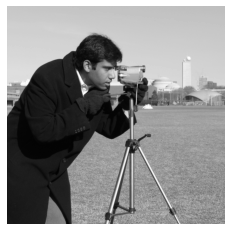

In [ ]:
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
plt.figure()
plt.imshow(camera.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

In [ ]:
camera

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

In [ ]:
camera_vert = conv(torch.FloatTensor(camera), sobel_kernel_vert, 1, 1)


(-0.5, 511.5, 511.5, -0.5)

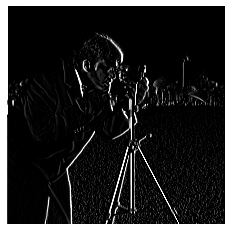

In [ ]:
plt.figure()
plt.imshow(camera_vert.numpy().astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off")

In [ ]:
camera_hor = conv(torch.FloatTensor(camera), sobel_kernel_hor, 1, 1)

(-0.5, 511.5, 511.5, -0.5)

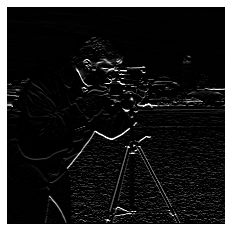

In [ ]:
plt.figure()
plt.imshow(camera_hor.numpy().astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off")

Допишите код ниже и проинтерпретируйте полученный результат:

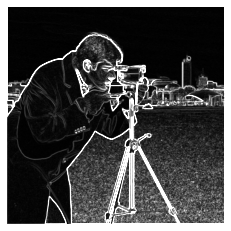

In [ ]:
camera_s_hor_filter = camera_hor
camera_s_vert_filter = camera_vert
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255);
plt.axis("off");

После применения горизонтального и вертикального фильтров ярко выделились контуры объектов. 

## Задание 2. AlexNet

**15 баллов**

Воссоздайте архитектуру `AlexNet` для определения заболевания растения. Датасеты уже созданы ниже.

In [2]:
INPUT_IMAGE_SIZE = 227
BATCH_SIZE = 64
N_EPOCHS = 10 # можно будет при желании увеличить
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [1]:
from IPython.display import clear_output

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
from torch import nn
from torch.nn import functional as F
import torch
import os
 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

clear_output()

In [4]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip

clear_output()

In [5]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=INPUT_IMAGE_SIZE):
        # папка с картинками
        self.img_dir = img_dir
        # отсортированный список с названиями файлов
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # названия папок с картинками переведем в номера классов
        self.class_dir = {name:idx for idx, name in enumerate(class_names)}
        self._number_to_labels = {idx:name for idx, name in enumerate(class_names)}

        # трансформации данных: мы изменяем размер,
        # так как AlexNet работает с картинками 227 на 227 пикселей
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean = [0.5183, 0.4845, 0.6570],
                                      std = [0.2111, 0.2227, 0.2291]
                                  )])
        self._transforms_for_plot = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor()
                                  ])


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx, normalize=True):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # применяем трансформации
        if normalize:
            transformed_img = self.transforms(image)
        
        transformed_img = self._transforms_for_plot(image)
        
        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]
        
        # как обычно возвращаем картинку и номер класса
        return transformed_img, label

In [6]:
train_dataset = BeanDataset("./train/")
valid_dataset = BeanDataset("./validation/")
test_dataset = BeanDataset("./test/")

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Посмотрим на количество классов:

In [ ]:
train_dataset._number_to_labels

{0: 'angular_leaf_spot', 1: 'bean_rust', 2: 'healthy'}

In [17]:
import pandas as pd
pd.Series(map(lambda path: path.split('/')[-2], train_dataset.files)).value_counts()

bean_rust            348
angular_leaf_spot    345
healthy              341
dtype: int64

In [ ]:
train_dataset.__len__()

1034

Посмотрим на наши картинки:

(код довольно эзотерический, но у меня было такое настроение)

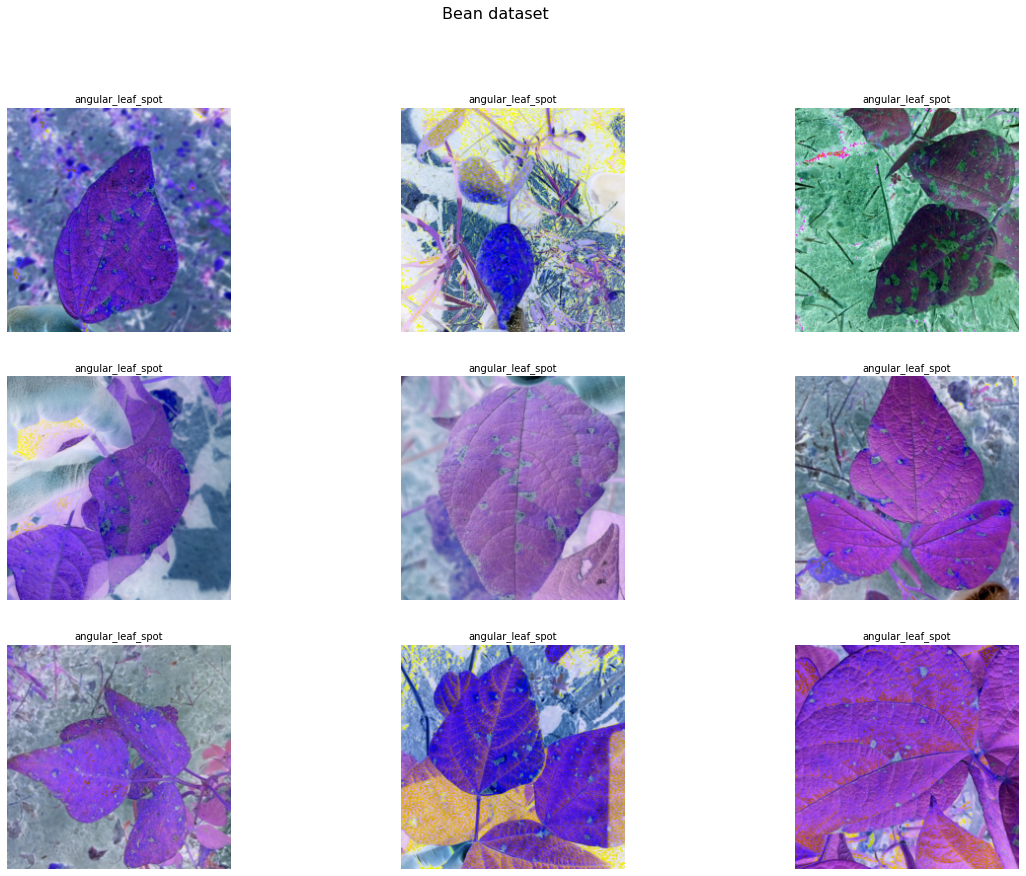

In [ ]:
ROW_IMG = 3
N_ROWS = 3

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    title = valid_dataset._number_to_labels[valid_dataset.__getitem__(index, normalize=False)[1]]
    plt.title(title, fontsize=10)
    
fig.suptitle("Bean dataset", fontsize=16);

### Реализация `AlexNet`

В лекции мы познакомились с архитектурой `AlexNet`, теперь пришло время реализовать ее самостоятельно. Важно, что на выходе число классов у нас будет сильно меньше чем 1000, нужно будет в начале это определить. Везде в качестве активации используется `ReLU`.

Также обратите внимание на параметры пулинга, тут ядро 3х3 со страйдом 2 (поэтому он называется overlapping).

Картинка может немного отличаться от того, что было на лекции, ориентируйтесь на картинку в ноутбуке.

Внимательно смотрите на параметры сверток (например, padding / stride).

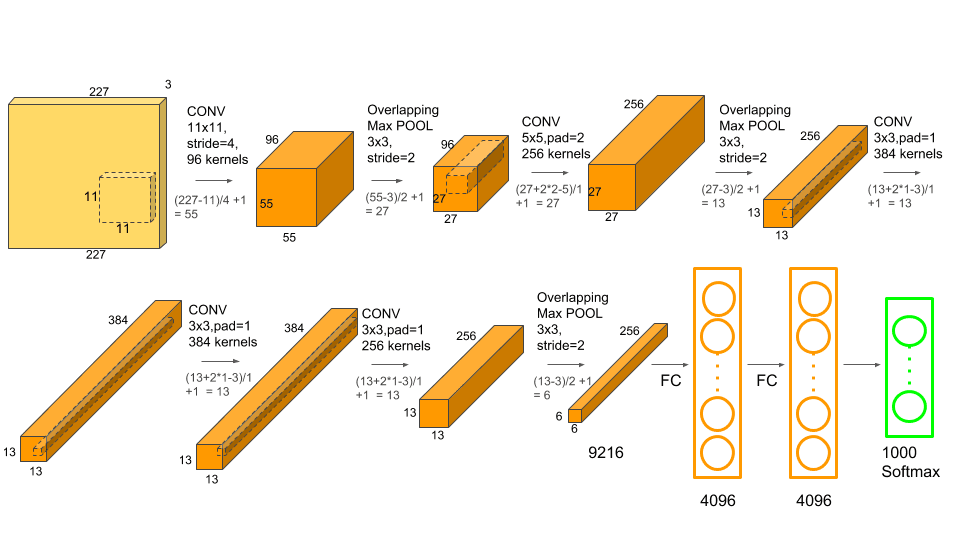

Как мы выяснили, у нас 3 класса: 0: 'angular_leaf_spot', 1: 'bean_rust', 2: 'healthy'



In [ ]:
N_CLASSES = 3
LEARNING_RATE = 5e-5 

In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=256 * 6 * 6, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=N_CLASSES),
        )


    def forward(self,x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)


        return logits, probs

Возьмите код для обучения и валидации модели, который был на лекции (если захочется, то его можно как угодно менять). В лекции мы возвращали из модели помимо логитов еще и вероятности классов, чтобы потом рисовать красивые картинки. Если захотите сделать также, то учтите это.

In [ ]:
def train_epoch(train_loader, model, criterion, optimizer, device):
    """
    Function for the training step of the training loop
    """

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss


def validate_epoch(valid_loader, model, criterion, device):
    """
    Function for the validation step of the training loop
    """
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss


def get_accuracy(model, dataloader, device):
    """
    model - 
    dataloader - 
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    
    return accuracy


def plot_losses(train_losses, valid_losses):
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=train_losses, label="Train Loss")
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=valid_losses, label="Validation Loss")


def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    """
    Function defining the entire training loop
    """

    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train_epoch(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate_epoch(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)
    
    return model, train_losses, valid_losses

Выберите функцию потерь и оптимизатор и обучите полученную модель на тренировочных данных, параллельно проверяя ее на валидационной части:

In [ ]:
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

17:13:27 --- Epoch: 0	Train loss: 1.0957	Valid loss: 1.0779	Train accuracy: 45.36	Valid accuracy: 47.37
17:14:00 --- Epoch: 1	Train loss: 0.9978	Valid loss: 0.9018	Train accuracy: 53.97	Valid accuracy: 56.39
17:14:32 --- Epoch: 2	Train loss: 0.9200	Valid loss: 1.1088	Train accuracy: 45.65	Valid accuracy: 49.62
17:15:04 --- Epoch: 3	Train loss: 0.9480	Valid loss: 0.8865	Train accuracy: 55.80	Valid accuracy: 55.64
17:15:36 --- Epoch: 4	Train loss: 0.8258	Valid loss: 0.7441	Train accuracy: 68.47	Valid accuracy: 66.17
17:16:09 --- Epoch: 5	Train loss: 0.7293	Valid loss: 0.7094	Train accuracy: 72.44	Valid accuracy: 72.18
17:16:41 --- Epoch: 6	Train loss: 0.6600	Valid loss: 0.8066	Train accuracy: 69.92	Valid accuracy: 66.92
17:17:13 --- Epoch: 7	Train loss: 0.6898	Valid loss: 0.6789	Train accuracy: 71.37	Valid accuracy: 70.68
17:17:46 --- Epoch: 8	Train loss: 0.6425	Valid loss: 0.6673	Train accuracy: 72.34	Valid accuracy: 70.68
17:18:18 --- Epoch: 9	Train loss: 0.6476	Valid loss: 0.6028	Trai

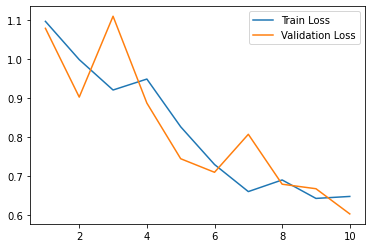

In [ ]:
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

Если вы все реализовали правильно, то `accuracy` на валидации должна быть в районе 0.8.

Получили accuracy примерно 0.8 при learning rate 5e-5. При несколько больших значениях lr accuracy получалось около 0.7. 



### Визуализация предсказаний

Визуализируем предсказания нашей модели и степень уверенности в них. Сделайте выводы о качестве полученной модели.

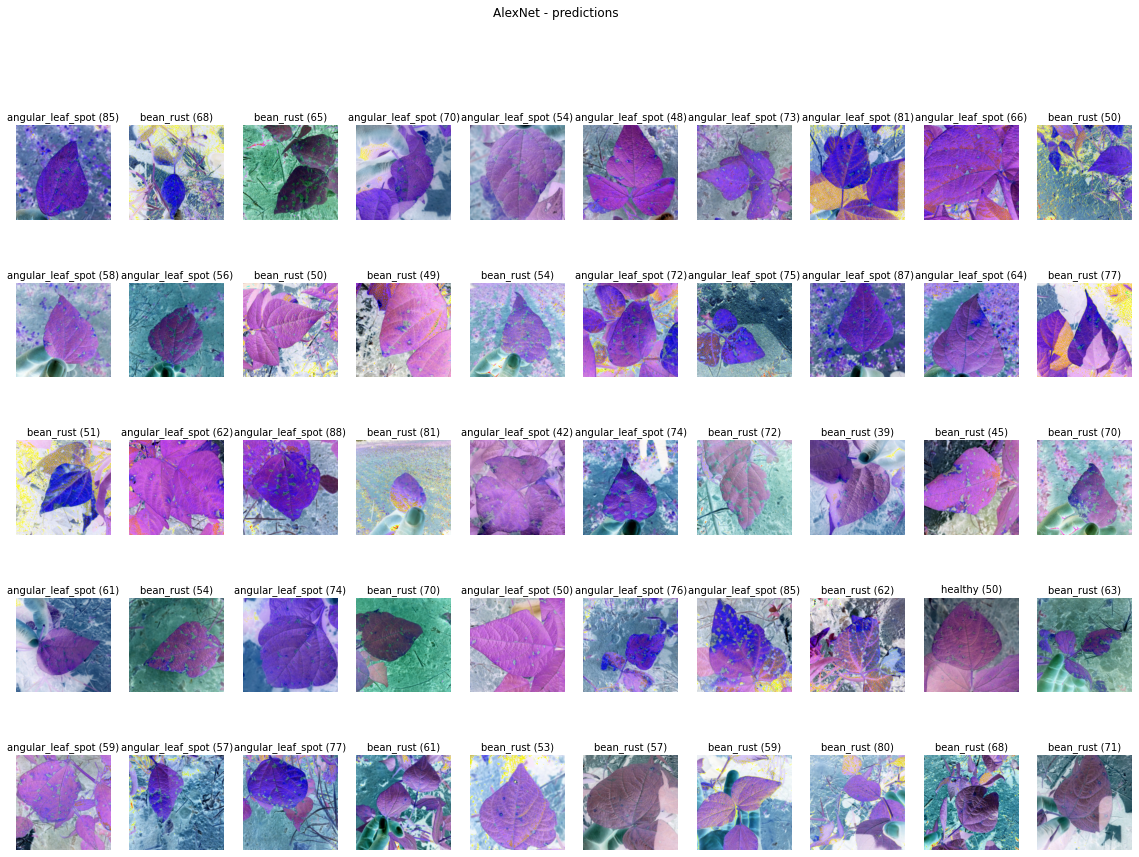

In [ ]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    
    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"
    
    plt.title(title, fontsize=10)
fig.suptitle('AlexNet - predictions');

При визуализации заметно, что для некоторых изображений уверенность в правильном предсказании около 40 или даже меньше, вследствие чего можно сделать вывод, что наша модель не очень хорошего качества.

## Задание 3. И снова социализация

**1 дополнительный балл**

Однажды такое уже бывало, но почему бы не повторить. Сходите погулять вместе с одногруппниками или созвонитесь в зуме, а сюда прикрепите какие-нибудь фотографии и кратко опишите, на какие темы вы общались)

Тут, как обычно, можно описать свои эмоции от выполнения этого задания:

**Ответ:**